# Tracks


#### Load data


In [2]:
import pandas as pd

df = pd.read_csv("./data/playlist_stats_clean.csv")

In [3]:
from notebook_functions import show

show(df)

name                           artist  \
0                     Rumble  Skrillex, Fred again.., Flowdan   
1          Strung Out Johnny                         Iggy Pop   
2                 Sail On By                     Blanco White   
3             Be On Your Way                         Daughter   
4                    Flowers                      Miley Cyrus   
..                       ...                              ...   
251    My Love Mine All Mine                           Mitski   
252               72 Seasons                        Metallica   
253            Paper Machete          Queens of the Stone Age   
254         Emotion Sickness          Queens of the Stone Age   
255  denver luna (acappella)                       Underworld   

                                      album added_by              added_at  
0                                    Rumble   Thomas  2023-01-09T10:23:07Z  
1                               EVERY LOSER     Hans  2023-01-09T20:40:04Z  
2                                Sail On By   Sandra  2023-01-13T12:15:11Z  
3                            Be On Your Way   Sandra  2023-01-13T12:19:16Z  
4                                   Flowers   Sandra  2023-01-15T09:41:42Z  
..                                      ...      ...                   ...  
251  The Land Is Inhospitable and So Are We     Hans  2023-12-28T18:22:39Z  
252                              72 Seasons     Hans  2023-12-28T20:47:02Z  
253                   In Times New Roman...     Hans  2023-12-28T21:05:05Z  
254                   In Times New Roman...     Hans  2023-12-28T21:06:39Z  
255                             denver luna     Hans  2023-12-28T21:15:53Z  

[256 rows x 5 columns]

#### Track stats


In [4]:
import plotly.express as px

# Creating a bar chart to visualize the number of tracks added by each person
added_by_count = df["added_by"].value_counts()
fig = px.bar(
    added_by_count,
    title="Number of Tracks Added by Each Person",
    labels={"index": "Added By", "value": "Number of Tracks"},
)
fig.show()

In [5]:
import plotly.express as px

# Convert 'added_at' to datetime and extract the month
df["added_at"] = pd.to_datetime(df["added_at"])
df["month"] = df["added_at"].dt.month

# Group by month and added_by, then count the number of tracks
grouped_df = df.groupby(["month", "added_by"]).size().reset_index(name="tracks")

# Creating a stacked bar chart
fig = px.bar(
    grouped_df,
    x="month",
    y="tracks",
    color="added_by",
    title="Number of Tracks Added by Each Person Per Month",
    labels={"month": "Month", "tracks": "Number of Tracks"},
    category_orders={"month": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
)

# Showing the figure
fig.show()

In [6]:
df.columns

Index(['name', 'artist', 'album', 'album_type', 'release_date', 'duration',
       'duration_ms', 'added_at', 'added_by_id', 'track_popularity',
       'track_id', 'track_uri', 'artist_uris', 'artist_names', 'enriched',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'artists_genres', 'artists_popularities',
       'artists_avg_popularity', 'added_by', 'month'],
      dtype='object')

In [7]:
import plotly.express as px

# Convert 'added_at' to datetime and extract the month
df["release_date"] = pd.to_datetime(df["release_date"])
df["year_month"] = df["release_date"].dt.to_period("M").astype(str)  # Convert Period to string

# Group by 'year_month' and count the number of tracks
grouped_df = df.groupby("year_month").size().reset_index(name="tracks")

# Creating a bar chart
fig = px.bar(
    grouped_df,
    x="year_month",
    y="tracks",
    title="Number of Tracks Released Per Month/Year",
    labels={"year_month": "Year-Month", "tracks": "Number of Tracks"},
)

# Showing the figure
fig.show()

In [8]:
# Creating a scatter plot of tempo vs valence
fig = px.scatter(
    df,
    x="tempo",
    y="valence",
    color="added_by",
    title="Tempo vs Valence for Each Song",
    labels={"tempo": "Tempo (BPM)", "valence": "Valence"},
)

# Showing the figure
fig.show()

In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Calculate the correlation matrix
# df_corr = df.drop(
#     [
#         "added_at",
#         "added_by",
#         "name",
#         "artist",
#         "album",
#         "album_type",
#         "track_id",
#         "artist_names",
#         "artist_genres",
#         "artist_popularities",
#         "release_date",
#         "duration",
#     ],
#     axis=1,
# )
# corr_matrix = df_corr.corr()

# # Creating a heatmap using Seaborn
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
# plt.title("Correlation Matrix of Variables")
# plt.show()

KeyError: "['artist_genres', 'artist_popularities'] not found in axis"

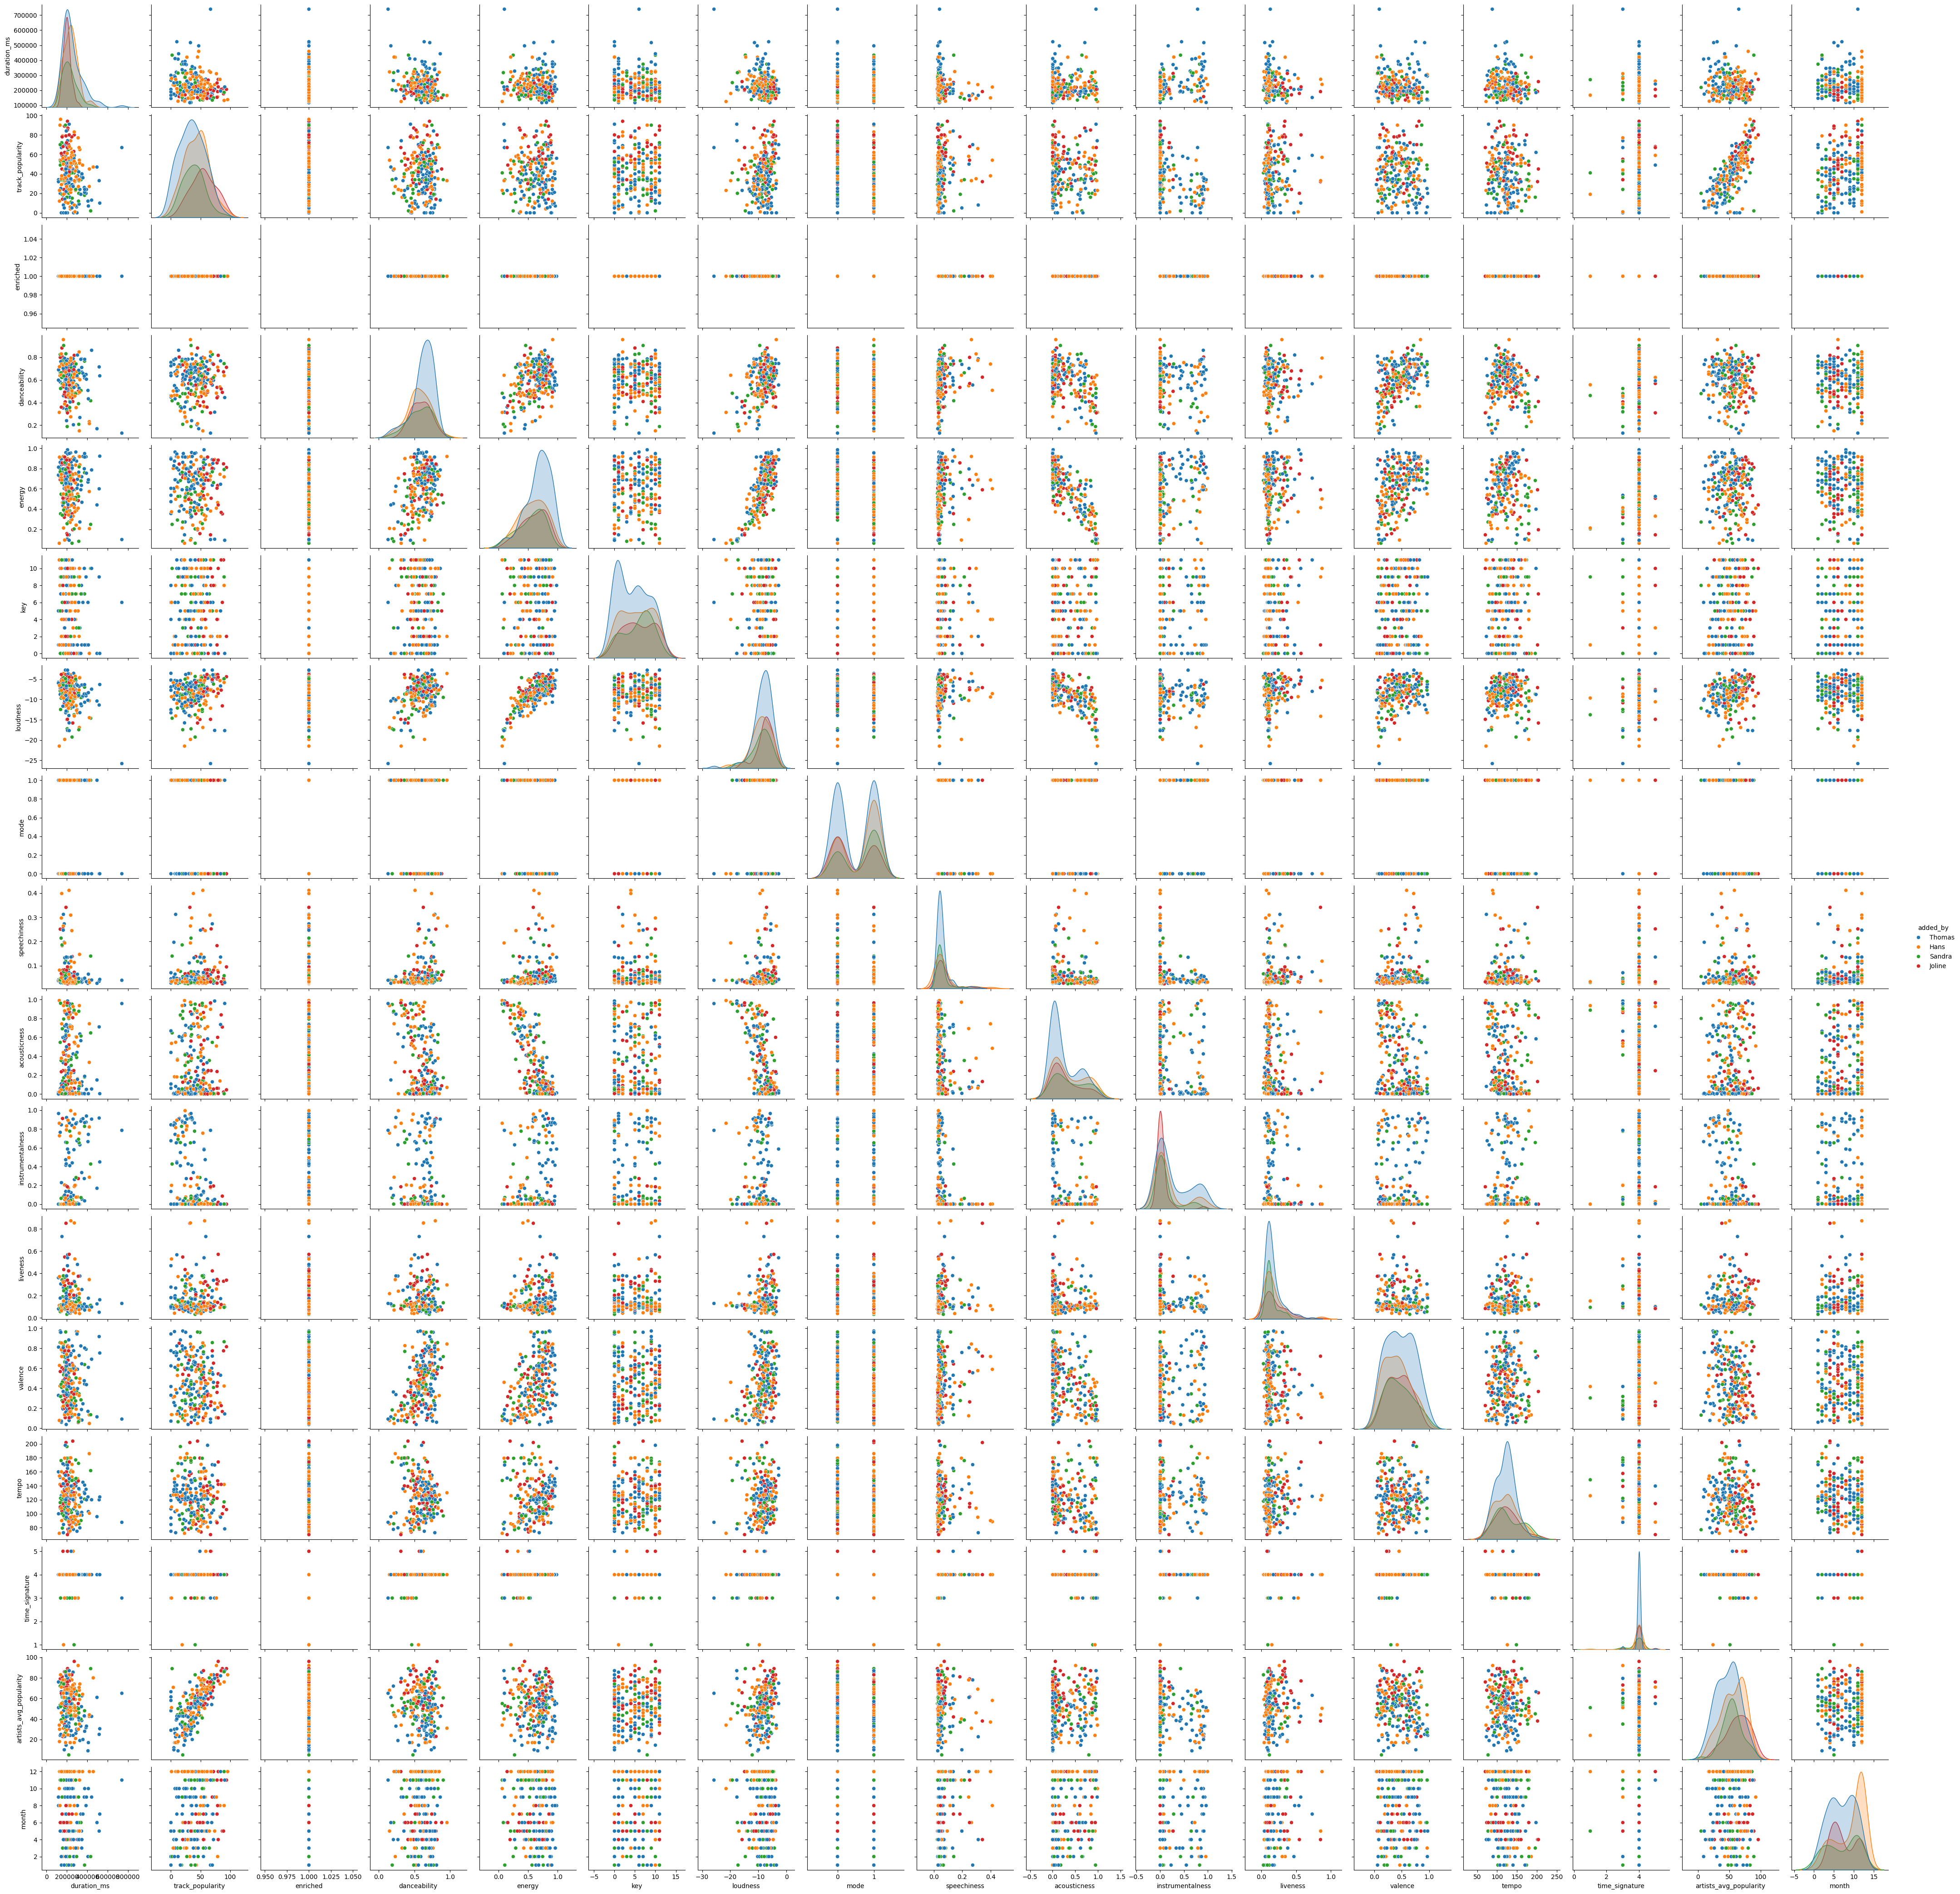

In [10]:
import seaborn as sns

# Create a pairplot of the DataFrame
sns.pairplot(df, hue="added_by")


# Display the plot
plt.show()

In [11]:
import numpy as np
import plotly.graph_objs as go
from notebook_functions import show

# Creating an interactive plot with Plotly
fig = go.Figure()

# Get list of adders
adders = df["added_by"].unique()

# Add track info to dataframe
df["track_info"] = df["name"] + " by " + df["artist"]

# Define color palette for the plots
color_palette = px.colors.qualitative.Plotly

# Adding boxplots with correct x-indexing
for i, adder in enumerate(df["added_by"].unique(), 1):
    # Filter by adder
    df_adder = df[df["added_by"] == adder]

    # Create boxplot
    fig.add_trace(
        go.Box(
            y=df_adder["tempo"],
            name=adder,
            boxpoints=False,
            x=[i] * len(df_adder),
            hoverinfo="none",
            marker_color=color_palette[i % len(color_palette)],
        )
    )

    # Create scatter plot points with jitter
    jittered_x = np.random.Generator(np.random.PCG64()).normal(i, 0.1, size=len(df_adder))

    fig.add_trace(
        go.Scatter(
            x=jittered_x,
            y=df_adder["tempo"],
            mode="markers",
            name=f"{adder} points",
            text=df_adder["track_info"],
            marker={"size": 6, "color": "grey", "opacity": 0.5},
        )
    )

    # Depict top 5 tracks by tempo
    show(df_adder, n=5, column="tempo", sort_values=True)

# Update layout to match the adders with their respective x-positions
fig.update_layout(
    title="Interactive Boxplot of Tempo with Scatter Plot Points Split by Who Added the Track",
    xaxis={
        "title": "Added By",
        "tickmode": "array",
        "tickvals": list(range(1, len(adders) + 1)),
        "ticktext": adders,
    },
    yaxis={"title": "Tempo"},
    showlegend=False,
)

# Show plot
fig.show()

tempo                        name                 artist  \
102  197.880  People (feat. Cian Ducrot)  Libianca, Cian Ducrot   
71   171.490                   The Score          Grian Chatten   
6    170.228                       LLYLM                ROSALÍA   
136  169.690   Paris, Texas (feat. SYML)     Lana Del Rey, SYML   
124  164.989            Off Wiv Ya Headz           Nia Archives   

                                                 album added_by  \
102                                   People (Remixes)   Thomas   
71                                            Fairlies   Thomas   
6                                                LLYLM   Thomas   
136  Did you know that there's a tunnel under Ocean...   Thomas   
124                                   Off Wiv Ya Headz   Thomas   

                     added_at  
102 2023-06-22 18:17:04+00:00  
71  2023-05-10 06:32:03+00:00  
6   2023-01-27 10:36:45+00:00  
136 2023-09-18 12:40:02+00:00  
124 2023-08-20 20:21:16+00:00

tempo                      name                  artist  \
10   185.945                     MERCY  John Cale, Laurel Halo   
23   180.008  Güzelliğin On Para Etmez               Altin Gün   
230  180.003        We Never Went Away                Ladytron   
166  179.471         Laat Mij Het Zijn                   Wende   
131  170.603                  Fairlies           Grian Chatten   

                        album added_by                  added_at  
10                      MERCY     Hans 2023-02-04 15:59:00+00:00  
23   Güzelliğin On Para Etmez     Hans 2023-03-02 11:12:50+00:00  
230              Time's Arrow     Hans 2023-12-23 16:49:29+00:00  
166              Sterrenlopen     Hans 2023-11-03 21:33:28+00:00  
131         Chaos For The Fly     Hans 2023-09-11 19:36:06+00:00

tempo             name         artist                  album added_by  \
34   196.081   Dans nos rêves   Ásgeir, Clou         Dans nos rêves   Sandra   
20   180.082  How To Be Human      Amber Run        How To Be Human   Sandra   
194  179.754    So Many Plans         Beirut          So Many Plans   Sandra   
159  179.340            Moths           RY X                  Moths   Sandra   
200  176.954        Mijn Club  Sophie Straat  Smartlap Is Niet Dood   Sandra   

                     added_at  
34  2023-03-27 17:59:54+00:00  
20  2023-02-28 23:56:12+00:00  
194 2023-11-24 16:37:20+00:00  
159 2023-10-17 07:35:00+00:00  
200 2023-11-27 20:33:13+00:00

tempo                name                    artist  \
47   203.840           Yard Sale  Ben Harper, Jack Johnson   
44   201.799             Ala Day            Typhoon, Freez   
106  179.621  Like It Always Was                Danny Vera   
205  174.052        leavemealone   Fred again.., Baby Keem   
49   159.993              Rommel                  Goldband   

                  album added_by                  added_at  
47            Yard Sale   Joline 2023-04-13 10:54:23+00:00  
44              Twintig   Joline 2023-04-13 10:53:32+00:00  
106  Like It Always Was   Joline 2023-06-29 08:59:49+00:00  
205        leavemealone   Joline 2023-12-10 12:50:35+00:00  
49               Rommel   Joline 2023-04-14 06:16:53+00:00

In [12]:
from notebook_functions import create_boxplot

# Create boxplot
create_boxplot(df, "track_popularity", print_top=True)

Top 5 track_popularity added by Thomas:


track_popularity                                               name  \
196                91  What Was I Made For? [From The Motion Picture ...   
226                84                                               BESO   
136                74                          Paris, Texas (feat. SYML)   
41                 72                                               Lost   
111                71                                    Fine Day Anthem   

                             artist  \
196                   Billie Eilish   
226         ROSALÍA, Rauw Alejandro   
136              Lana Del Rey, SYML   
41                      Linkin Park   
111  Skrillex, Boys Noize, Opus III   

                                                 album added_by  \
196  What Was I Made For? [From The Motion Picture ...   Thomas   
226                                                 RR   Thomas   
136  Did you know that there's a tunnel under Ocean...   Thomas   
41                                                Lost   Thomas   
111                                    Fine Day Anthem   Thomas   

                     added_at  
196 2023-11-24 19:29:02+00:00  
226 2023-12-23 13:15:42+00:00  
136 2023-09-18 12:40:02+00:00  
41  2023-04-06 20:38:26+00:00  
111 2023-07-13 06:16:49+00:00

Top 5 track_popularity added by Hans:


track_popularity                       name                       artist  \
251                96      My Love Mine All Mine                       Mitski   
127                90                      Prada  cassö, RAYE, D-Block Europe   
128                83                  Escapism.              RAYE, 070 Shake   
11                 79  Unholy (feat. Kim Petras)        Sam Smith, Kim Petras   
138                77  Slime You Out (feat. SZA)                   Drake, SZA   

                                      album added_by                  added_at  
251  The Land Is Inhospitable and So Are We     Hans 2023-12-28 18:22:39+00:00  
127                                   Prada     Hans 2023-08-28 09:40:07+00:00  
128                   My 21st Century Blues     Hans 2023-08-28 09:57:11+00:00  
11                                   Gloria     Hans 2023-02-05 13:48:45+00:00  
138                           Slime You Out     Hans 2023-09-24 07:59:34+00:00

Top 5 track_popularity added by Sandra:


track_popularity                            name  \
231                90                         Houdini   
184                72  UNHEALTHY (feat. Shania Twain)   
186                70                        Basquiat   
21                 65                        Die 4 Me   
35                 55        Morgen Wordt Fantastisch   

                       artist                           album added_by  \
231                  Dua Lipa                         Houdini   Sandra   
184  Anne-Marie, Shania Twain  UNHEALTHY (feat. Shania Twain)   Sandra   
186                     Asake                     Work Of Art   Sandra   
21                     Halsey                        Die 4 Me   Sandra   
35          Acda en de Munnik        Morgen Wordt Fantastisch   Sandra   

                     added_at  
231 2023-12-23 20:37:31+00:00  
184 2023-11-18 12:03:39+00:00  
186 2023-11-18 12:09:16+00:00  
21  2023-03-01 00:06:45+00:00  
35  2023-03-27 18:12:05+00:00

Top 5 track_popularity added by Joline:


track_popularity                                               name  \
170                94                               Standing Next to You   
81                 89            Dance The Night - From Barbie The Album   
78                 87                                  Say Yes To Heaven   
172                85  Can’t Catch Me Now - from The Hunger Games: Th...   
45                 80                                    Search & Rescue   

             artist                                              album  \
170       Jung Kook                                             GOLDEN   
81         Dua Lipa            Dance The Night (From Barbie The Album)   
78     Lana Del Rey                                  Say Yes To Heaven   
172  Olivia Rodrigo  Can’t Catch Me Now (from The Hunger Games: The...   
45            Drake                                    Search & Rescue   

    added_by                  added_at  
170   Joline 2023-11-09 08:53:11+00:00  
81    Joline 2023-05-26 07:14:03+00:00  
78    Joline 2023-05-22 06:41:08+00:00  
172   Joline 2023-11-09 08:55:04+00:00  
45    Joline 2023-04-13 10:53:41+00:00

In [13]:
cols_ordinal = df.columns
cols_ordinal = cols_ordinal.drop(
    [
        "name",
        "artist",
        "album",
        "album_type",
        "track_id",
        "artist_names",
        "artist_genres",
        "artist_popularities",
        "release_date",
        "added_at",
        "added_by",
        "track_info",
        "duration",
    ]
)
cols_ordinal

KeyError: "['artist_genres', 'artist_popularities'] not found in axis"

In [ ]:
from notebook_functions import create_boxplot

for col in cols_ordinal:
    create_boxplot(df, col)

In [17]:
from notebook_functions import create_2d_scatter_plot

fig = create_2d_scatter_plot(df, "danceability", "energy", "track_info")

ImportError: cannot import name 'create_2d_scatter_plot' from 'notebook_functions' (/Users/thomasbrouwer/Code/spotify/notebooks/notebook_functions.py)